# Welcome to Git-DS training 
- We are going to use a in house developed library to compute efficient portfolio (with 2 assets)
- Using Modern Portfolio Theory or the Markowitz Model
- Using real stocks and quotes from S&P 500 


### Markowitz

Given 2 assets $A_1$, $A_2$, with expected retunns R_1, $R_2$

### The Financial Theory behind the  Markowitz Model

The modern portfolio theory (MPT) was developed in 1952 by Harry Markowitz, an American economist. The objective of the MPT is to maximize returns within  a calculated risk by analyzing various possible portfolios for a set of given securities. 

In other words, the Markowitz Model looks to create an efficient portfolio. An efficient portfolio is the one that has the minimum possible return for a given level of risk. 
 


#### Financial basic concepts

We know this might be a little confusing so lets first try to understand some other financial basic concepts. 

What is an asset? 
It is a resource with economic value that provides a future benefit. The most common financial assets are stocks (represent the ownership of a fraction of a company) and bonds (represents a loan made by an investor to a borrower, IOU). -- tal vez quite bonos

What is a portfolio? 
Is a collection of assets that is owned by one person or entity.

How is return defined in finance?
in finance return is the financial gain or loss on an investment. It is typically expressed as the change in the value of an investment over time. 

How is risk defined in finance?
Risk is defined in financial terms as the chance that the investment's actual gains will differ from the  expected outcome or return. Risk includes the possibility of losing some or all of an original investment.

Financial risk is assessed by considering historical behaviors and outcomes. One of the most common metrics to measure how risky an asset is, is using the Standard Deviation. (Standard Deviation is a measure of the volatility of assets, that is likely to change and in what magnitude, compared to the average of other assets)

Why should we have a portfolio of several stocks instead of a single stock?
This is related to the diversification of risk. If we have only a single stock we are completly exposed to the performance of that stock. If it goes up in value is great, but if goes down then we are facing looses. If we diversify in several stocks, even when one of them is performing poorly, the other ones can be having a positive performance. 

## Let's get started

We will use the library we develop in house, function_utils. 
This will have all the methods needed to calculate the efficient frontier for two portfolios. 
First let's start by downloading the Portfolio, PortfolioManager and Asset classes. 

In [2]:
from function_utils import Portfolio, PortfolioManager, Asset

We would need to pass as string two of the tickers of the stocks that are part of the S&P 500

Note: the S&P500 is an index with 500 of the biggest companies in the US as members. 

In [3]:
ASSETS = ['GOOGL', 'AAPL']

The asset class takes as arguments the name of the ticker as well as an optional start date. If the date is not specified it will go to the default date '2021-01-01'
This method will download all the data for the specified tickets from the date that was given. It will drop all the values it doesnt need only leaving the "Closing Price", a time series which we will use for all the following calculations. 
The class will also generate other attributes that are needed based on the quote information it will download. Mainly the following two: 


    Expected returns: which is as it names suggest, related to returns. It will do the calculation based on the simple returns it will create expected return using the log returns. 

    Variance: which would be a measure related to risk, it's calculated using the expected return.

The final part of the Asset method it created a plot with both the variance and expected returns to be able to observe the behavior of the results. 

    



In [4]:
asset = Asset('GOOGL')

In [5]:
history_prices = asset._history.reset_index()

C:\Users\jgarciaceron\AppData\Local\Temp\ipykernel_40756\2888223191.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


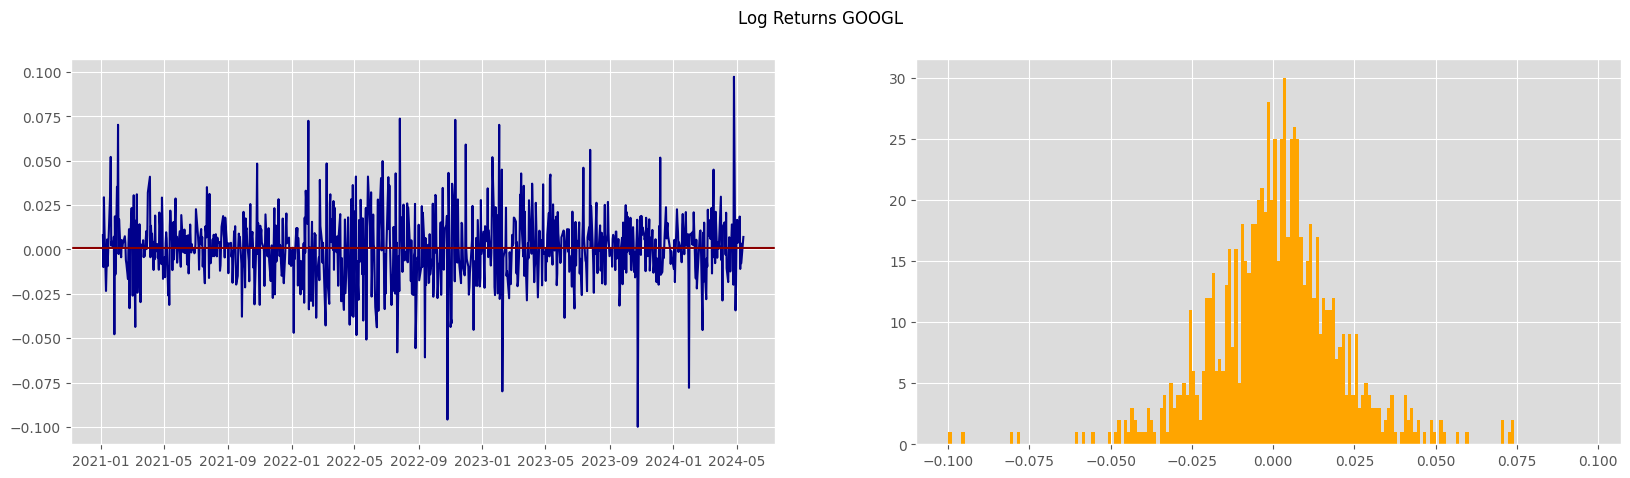

In [6]:
fig, ax = asset.plot_time_series()
fig.show()

In [7]:
base_portfolio = Portfolio(ASSETS, weights=[0.5, 0.5])

The Porfolio method its designed to be able to create a project, transforming the time series information we created using the Asset class, 

The steps as it follow are the next:
It creates a weight matrix, in which it creates a number of scenarios with the condition that the sum of the two random values always equals to one, as it will represent the 100% of the weight distribuiton it can allocate. 

After it calculate the covariance matrix between the different assets, to create the risk metric. 

In [8]:
base_portfolio

Portfolio(Assets=[GOOGL, AAPL], Weights=[0.5, 0.5])

In [9]:
manager = PortfolioManager('markowitz', base_portfolio)

Finanly the portfoliomanager method takes the portfolio that was created using the previous portfolio method, and it 

In [10]:
manager

PortfolioManager(base_portfolio=Portfolio(Assets=[GOOGL, AAPL], Weights=[0.5, 0.5]), markowitz)

C:\Users\jgarciaceron\AppData\Local\Temp\ipykernel_40756\2255071222.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


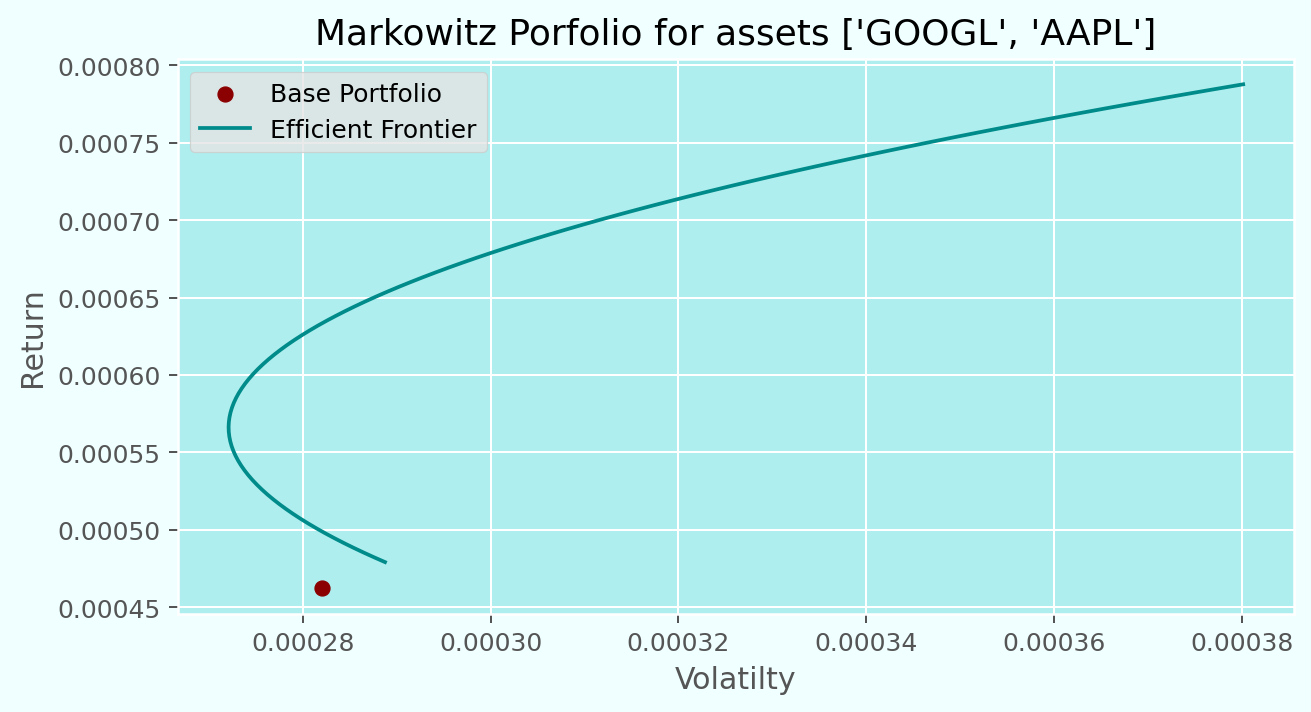

In [11]:
fig, ax = manager.plot_efficient_frontier()
fig.show()